### Sprint 9. Feature Engineering
##### Exercici 1

In [4]:
import pandas as pd
import pycountry
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('atp2017.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          388 non-null    object 
 1   tourney_name        388 non-null    object 
 2   surface             388 non-null    object 
 3   draw_size           388 non-null    int64  
 4   tourney_level       388 non-null    object 
 5   tourney_date        388 non-null    int64  
 6   match_num           388 non-null    int64  
 7   winner_id           388 non-null    int64  
 8   winner_seed         149 non-null    float64
 9   winner_entry        18 non-null     object 
 10  winner_name         388 non-null    object 
 11  winner_hand         386 non-null    object 
 12  winner_ht           250 non-null    float64
 13  winner_ioc          388 non-null    object 
 14  winner_age          388 non-null    float64
 15  winner_rank         375 non-null    float64
 16  winner_r

##### Descripció dels atributs
ace = absolute number of aces
df = number of double faults
svpt = total serve points
1stin = 1st serve in
1st won = points won on 1st serve
2ndwon = points won on 2nd serve
SvGms = serve games
bpSaved = break point saved
bpFaced = break point faced

In [2]:
df.head(3)

NameError: name 'df' is not defined

##### Seleccionem les columnes que ens interessen

In [4]:
atp=df.iloc[:, [2,10,11,12,13,14,15,29,30,31,32,33,34,35,36,37,38,39]]

In [5]:
atp.head()

,surface,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced
0,Hard,Grigor Dimitrov,R,188.0,BUL,25.634497,17.0,F,108.0,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0
1,Hard,Grigor Dimitrov,R,188.0,BUL,25.634497,17.0,SF,87.0,4.0,1.0,58.0,36.0,27.0,18.0,10.0,0.0,0.0
2,Hard,Kei Nishikori,R,178.0,JPN,27.011636,5.0,SF,101.0,1.0,1.0,77.0,56.0,37.0,14.0,11.0,4.0,5.0
3,Hard,Milos Raonic,R,196.0,CAN,26.017796,3.0,QF,140.0,23.0,3.0,97.0,62.0,50.0,16.0,15.0,6.0,7.0
4,Hard,Grigor Dimitrov,R,188.0,BUL,25.634497,17.0,QF,124.0,3.0,3.0,94.0,52.0,42.0,23.0,14.0,13.0,14.0


In [6]:
atp.isnull().sum()

surface          0
winner_name      0
winner_hand      2
winner_ht      138
winner_ioc       0
winner_age       0
winner_rank     13
round            0
minutes         14
w_ace           14
w_df            14
w_svpt          14
w_1stIn         14
w_1stWon        14
w_2ndWon        14
w_SvGms         14
w_bpSaved       14
w_bpFaced       14
dtype: int64

In [7]:
atp.dropna(subset = ["winner_rank"])
atp.dropna(subset = ["winner_hand"])
atp.head()

,surface,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced
0,Hard,Grigor Dimitrov,R,188.0,BUL,25.634497,17.0,F,108.0,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0
1,Hard,Grigor Dimitrov,R,188.0,BUL,25.634497,17.0,SF,87.0,4.0,1.0,58.0,36.0,27.0,18.0,10.0,0.0,0.0
2,Hard,Kei Nishikori,R,178.0,JPN,27.011636,5.0,SF,101.0,1.0,1.0,77.0,56.0,37.0,14.0,11.0,4.0,5.0
3,Hard,Milos Raonic,R,196.0,CAN,26.017796,3.0,QF,140.0,23.0,3.0,97.0,62.0,50.0,16.0,15.0,6.0,7.0
4,Hard,Grigor Dimitrov,R,188.0,BUL,25.634497,17.0,QF,124.0,3.0,3.0,94.0,52.0,42.0,23.0,14.0,13.0,14.0


In [8]:
atp=atp.fillna(atp.mean().astype(int))

In [9]:
atp['winner_age']=round(atp['winner_age']).astype(int)
atp['minutes']=round(atp['minutes']).astype(int)

##### Opmplim les dues dades nules amb la variable més comuna

In [10]:
# per saber el vvalor maxim:atp['winner_hand'].value_counts().idxmax()
atp['winner_hand'] = atp['winner_hand'].fillna(atp['winner_hand'].value_counts().idxmax())

##### Simplifiquem la columna de països a continents. Com alguns codis no cincideixen, s'ha de fer una mica d'investigació i neteja

In [11]:
atp['winner_ioc'].unique()

array(['BUL', 'JPN', 'CAN', 'SUI', 'ESP', 'AUT', 'AUS', 'GBR', 'ARG',
       'GER', 'FRA', 'USA', 'SRB', 'RUS', 'ISR', 'SVK', 'TPE', 'BEL',
       'KOR', 'IND', 'BRA', 'CZE', 'CRO', 'POR', 'CYP', 'NED', 'TUN',
       'LUX', 'URU', 'ITA', 'DOM', 'UKR', 'UZB', 'CHI', 'ECU', 'BIH',
       'ROU', 'BLR', 'HUN', 'VEN', 'PAR', 'BAR', 'BOL', 'ESA', 'GUA',
       'MEX', 'INA', 'PHI', 'THA', 'KUW', 'PAK', 'IRI', 'HKG', 'VIE',
       'RSA', 'EST', 'FIN', 'LTU', 'MAD', 'DEN', 'MAR', 'SLO', 'MON',
       'NOR', 'SWE', 'TUR'], dtype=object)

In [12]:
py3=list()
for x in pycountry.countries:
        py3.append(x.alpha_3 )

In [13]:
atp['winner_ioc']

0      BUL
1      BUL
2      JPN
3      CAN
4      BUL
      ... 
383    RUS
384    USA
385    USA
386    USA
387    USA
Name: winner_ioc, Length: 388, dtype: object

In [14]:
no=set()
for xx in atp['winner_ioc']:
    if xx not in py3:
        no.add(xx)
print(no)

{'RSA', 'POR', 'TPE', 'KUW', 'IRI', 'SLO', 'ESA', 'PHI', 'CHI', 'NED', 'MAD', 'GER', 'URU', 'SUI', 'INA', 'MON', 'DEN', 'CRO', 'PAR', 'GUA', 'BAR', 'VIE', 'BUL'}


In [15]:
codis = {'BAR':'BRB', 'BUL':'BGR' , 'CHI':'CHN', 'CRO':'HRV', 'DEN':'DNK', 'ESA':'SLV',
         'GER':'DEU', 'GUA':'GTM','INA':'IDN','IRI':'IRN','KUW':'KWT','MAD':'MDG','MON':'MCO','NED':'NLD','PAR':'PRY',
         'PHI':'PHL', 'POR':'PRT','RSA':'ZAF', 'SLO':'SVN', 'SUI':'CHE', 'TPE':'TWN', 'URU':'URY', 'VIE':'AUT' }


In [16]:
atp=atp.replace({"winner_ioc": codis})

In [17]:
import pycountry_convert as pc
continent = []
for xxx in atp['winner_ioc']:
    for co in list(pycountry.countries):
        if xxx in co.alpha_3:
            #yyy=co.alpha_2
            #print (co.alpha_2)
            country_continent_code = pc.country_alpha2_to_continent_code(co.alpha_2)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            continent.append(country_continent_name)

atp.insert(5, 'Continent', continent)
#eliminem la columna de països
atp=atp.drop(['winner_ioc'], axis=1)

In [18]:
atp.head(1)

,surface,winner_name,winner_hand,winner_ht,Continent,winner_age,winner_rank,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced
0,Hard,Grigor Dimitrov,R,188.0,Europe,26,17.0,F,108,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0


##### Convertim la columna winner_hand a dummies, després afegim els ambidextres (winner_handU) tant a la columna esquerra i dreta i després l'eliminem 

In [19]:
atp = pd.get_dummies(atp, prefix='hand' , prefix_sep='_', columns=['winner_hand'])

In [20]:
atp.loc[atp.hand_U == 1, "hand_L"] = 1
atp.loc[atp.hand_U == 1, "hand_R"] = 1
atp=atp.drop(['hand_U'], axis=1)

In [21]:
#elimino les rondes ´Robin´o classificatòries
atp=atp[~atp['round'].isin(['RR'])]

In [22]:
#funció per moure columnes:
def colmove(position,colname):
    temp = atp.pop(colname)
    atp.insert(position, colname, temp )
    
colmove(2,'hand_R')
colmove(3,'hand_L')

In [23]:
#atp.to_csv('atp.csv')

In [24]:
atp['round'].value_counts()

R32     80
R128    64
R16     48
R64     32
QF      24
SF      12
F        6
Name: round, dtype: int64

In [25]:
atp = pd.get_dummies(atp, prefix_sep='_', columns=['round'],drop_first=True)
atp = pd.get_dummies(atp, prefix='', prefix_sep='', columns=['Continent'],drop_first=True)
atp = pd.get_dummies(atp, prefix='', prefix_sep='', columns=['surface'],drop_first=True)

In [26]:
atp.head()

,winner_name,hand_R,hand_L,winner_ht,winner_age,winner_rank,minutes,w_ace,w_df,w_svpt,...,round_R128,round_R16,round_R32,round_R64,round_SF,Asia,Europe,North America,Oceania,South America
0,Grigor Dimitrov,1,0,188.0,26,17.0,108,7.0,2.0,77.0,...,0,0,0,0,0,0,1,0,0,0
1,Grigor Dimitrov,1,0,188.0,26,17.0,87,4.0,1.0,58.0,...,0,0,0,0,1,0,1,0,0,0
2,Kei Nishikori,1,0,178.0,27,5.0,101,1.0,1.0,77.0,...,0,0,0,0,1,1,0,0,0,0
3,Milos Raonic,1,0,196.0,26,3.0,140,23.0,3.0,97.0,...,0,0,0,0,0,0,0,1,0,0
4,Grigor Dimitrov,1,0,188.0,26,17.0,124,3.0,3.0,94.0,...,0,0,0,0,0,0,1,0,0,0


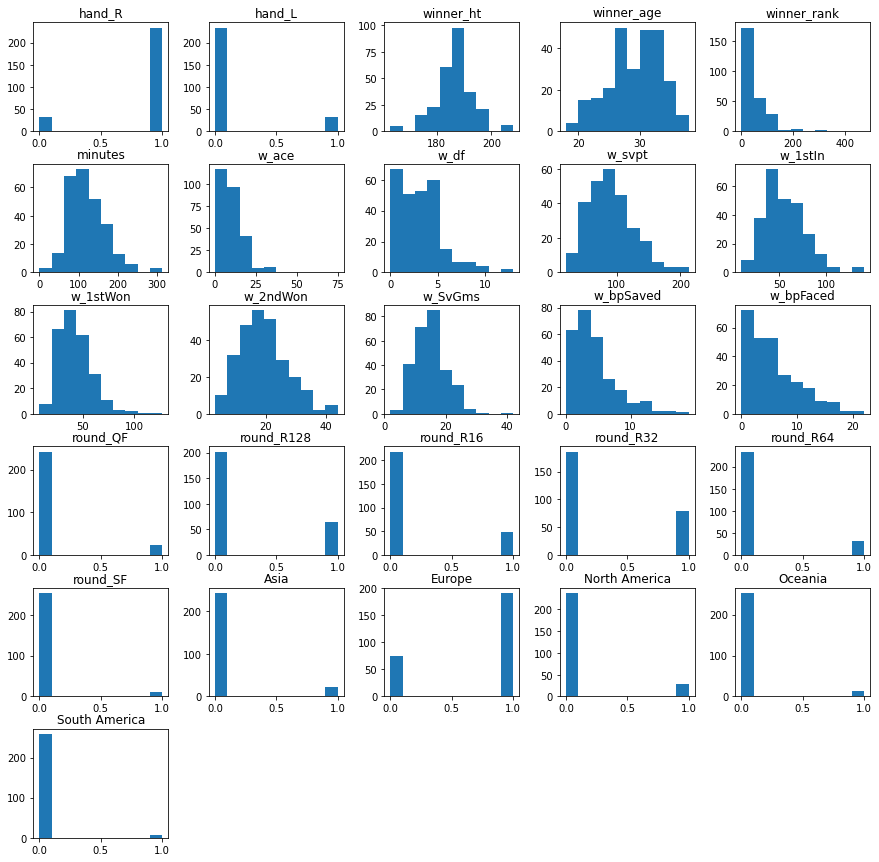

In [27]:
hist = atp.hist(figsize = (15,15),grid=False)

In [28]:
print(list(atp.columns))

['winner_name', 'hand_R', 'hand_L', 'winner_ht', 'winner_age', 'winner_rank', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_SF', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


In [29]:
#canvi de nom d'algunes columnes
cols=['name', 'hand_R', 'hand_L', 'height', 'age', 'rank', 'minutes', 'ace', 'df', 'vpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_SF', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
atp.columns=cols

In [30]:
atp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           266 non-null    object 
 1   hand_R         266 non-null    uint8  
 2   hand_L         266 non-null    uint8  
 3   height         266 non-null    float64
 4   age            266 non-null    int64  
 5   rank           266 non-null    float64
 6   minutes        266 non-null    int64  
 7   ace            266 non-null    float64
 8   df             266 non-null    float64
 9   vpt            266 non-null    float64
 10  1stIn          266 non-null    float64
 11  1stWon         266 non-null    float64
 12  2ndWon         266 non-null    float64
 13  SvGms          266 non-null    float64
 14  bpSaved        266 non-null    float64
 15  bpFaced        266 non-null    float64
 16  round_QF       266 non-null    uint8  
 17  round_R128     266 non-null    uint8  
 18  round_R16 

In [1]:
# guardem (amb una vegada n'hi ha prou, per'xò ara està com a comentari)
    #la nova base de dades per utilitzar-la ulteriorment
#atp.to_csv('atp_dummy.csv')

##### Estandaritzarem les columnes no-dummies amb Standar scalling

In [32]:
atp_nrm=atp[['height','age','rank', 'minutes', 'ace', 'df', 'vpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced']]
atp_nrm

,height,age,rank,minutes,ace,df,vpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
0,188.0,26,17.0,108,7.0,2.0,77.0,52.0,41.0,12.0,13.0,5.0,7.0
1,188.0,26,17.0,87,4.0,1.0,58.0,36.0,27.0,18.0,10.0,0.0,0.0
2,178.0,27,5.0,101,1.0,1.0,77.0,56.0,37.0,14.0,11.0,4.0,5.0
3,196.0,26,3.0,140,23.0,3.0,97.0,62.0,50.0,16.0,15.0,6.0,7.0
4,188.0,26,17.0,124,3.0,3.0,94.0,52.0,42.0,23.0,14.0,13.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,185.0,31,9.0,164,4.0,4.0,105.0,76.0,63.0,15.0,16.0,4.0,4.0
262,188.0,26,15.0,132,8.0,4.0,96.0,61.0,46.0,15.0,14.0,8.0,10.0
263,185.0,35,17.0,184,11.0,3.0,143.0,86.0,62.0,33.0,24.0,8.0,12.0
264,185.0,31,9.0,296,8.0,3.0,184.0,135.0,93.0,27.0,28.0,12.0,16.0


In [33]:
#atp[atp.columns.drop('name')] --> per seleccionar totes les columnes excepte...

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
atp_std= scaler.fit_transform(atp_nrm)
atp_std

array([[ 0.27054116, -0.64209919, -0.56146127, ..., -0.30472952,
         0.26490949,  0.28484308],
       [ 0.27054116, -0.64209919, -0.56146127, ..., -0.87825347,
        -1.15577449, -1.27051709],
       [-1.19511969, -0.41191269, -0.77712727, ..., -0.68707882,
        -0.0192273 , -0.15954554],
       ...,
       [-0.1691571 ,  1.42957933, -0.56146127, ...,  1.79819164,
         1.11731988,  1.39581463],
       [-0.1691571 ,  0.50883332, -0.7052386 , ...,  2.56289025,
         2.25386707,  2.28459187],
       [-0.1691571 ,  1.42957933, -0.56146127, ...,  1.41584234,
         2.53800386,  2.50678618]])

In [34]:
atp_std_df = pd.DataFrame(atp_std, columns=atp_nrm.columns)

In [35]:
atp_std_df

,height,age,rank,minutes,ace,df,vpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
0,0.270541,-0.642099,-0.561461,-0.295288,-0.355325,-0.489001,-0.392730,-0.157185,-0.105679,-0.952939,-0.304730,0.264909,0.284843
1,0.270541,-0.642099,-0.561461,-0.730507,-0.738500,-0.925491,-0.941033,-0.874204,-0.950201,-0.176182,-0.878253,-1.155774,-1.270517
2,-1.195120,-0.411913,-0.777127,-0.440361,-1.121675,-0.925491,-0.392730,0.022070,-0.346971,-0.694020,-0.687079,-0.019227,-0.159546
3,1.443070,-0.642099,-0.813072,0.367902,1.688274,-0.052510,0.184431,0.290952,0.437229,-0.435101,0.077620,0.549046,0.284843
4,0.270541,-0.642099,-0.561461,0.036307,-0.866225,-0.052510,0.097857,-0.157185,-0.045356,0.471116,-0.113555,2.538004,1.840203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,-0.169157,0.508833,-0.705239,0.865295,-0.738500,0.383980,0.415296,0.918344,1.221428,-0.564560,0.268794,-0.019227,-0.381740
262,0.270541,-0.642099,-0.597406,0.202105,-0.227600,0.383980,0.155573,0.246138,0.195937,-0.564560,-0.113555,1.117320,0.951426
263,-0.169157,1.429579,-0.561461,1.279789,0.155575,-0.052510,1.511902,1.366481,1.161105,1.765710,1.798192,1.117320,1.395815
264,-0.169157,0.508833,-0.705239,3.600956,-0.227600,-0.052510,2.695082,3.562352,3.031120,0.988954,2.562890,2.253867,2.284592


In [36]:
atp_norm_new=atp.copy()

In [37]:
atp_norm_new.update(atp_std_df)

In [38]:
atp_norm_new.head()

,name,hand_R,hand_L,height,age,rank,minutes,ace,df,vpt,...,round_R128,round_R16,round_R32,round_R64,round_SF,Asia,Europe,North America,Oceania,South America
0,Grigor Dimitrov,1,0,0.270541,-0.642099,-0.561461,-0.295288,-0.355325,-0.489001,-0.392730,...,0,0,0,0,0,0,1,0,0,0
1,Grigor Dimitrov,1,0,0.270541,-0.642099,-0.561461,-0.730507,-0.738500,-0.925491,-0.941033,...,0,0,0,0,1,0,1,0,0,0
2,Kei Nishikori,1,0,-1.195120,-0.411913,-0.777127,-0.440361,-1.121675,-0.925491,-0.392730,...,0,0,0,0,1,1,0,0,0,0
3,Milos Raonic,1,0,1.443070,-0.642099,-0.813072,0.367902,1.688274,-0.052510,0.184431,...,0,0,0,0,0,0,0,1,0,0
4,Grigor Dimitrov,1,0,0.270541,-0.642099,-0.561461,0.036307,-0.866225,-0.052510,0.097857,...,0,0,0,0,0,0,1,0,0,0


##### Apliquem la standarització amb MinMax Scaler perquè no les dades no són normalitzades 

In [39]:
from sklearn.preprocessing import MinMaxScaler
maxscaler = MinMaxScaler(feature_range=(0,1))
atp_max= maxscaler.fit_transform(atp_nrm)
atp_max


array([[0.55555556, 0.4       , 0.03382664, ..., 0.275     , 0.26315789,
        0.31818182],
       [0.55555556, 0.4       , 0.03382664, ..., 0.2       , 0.        ,
        0.        ],
       [0.33333333, 0.45      , 0.00845666, ..., 0.225     , 0.21052632,
        0.22727273],
       ...,
       [0.48888889, 0.85      , 0.03382664, ..., 0.55      , 0.42105263,
        0.54545455],
       [0.48888889, 0.65      , 0.01691332, ..., 0.65      , 0.63157895,
        0.72727273],
       [0.48888889, 0.85      , 0.03382664, ..., 0.5       , 0.68421053,
        0.77272727]])

In [40]:
atp_max_df = pd.DataFrame(atp_max, columns=atp_nrm.columns)
atp_max_df

,height,age,rank,minutes,ace,df,vpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
0,0.555556,0.40,0.033827,0.343949,0.093333,0.153846,0.295337,0.323077,0.277311,0.219512,0.275,0.263158,0.318182
1,0.555556,0.40,0.033827,0.277070,0.053333,0.076923,0.196891,0.200000,0.159664,0.365854,0.200,0.000000,0.000000
2,0.333333,0.45,0.008457,0.321656,0.013333,0.076923,0.295337,0.353846,0.243697,0.268293,0.225,0.210526,0.227273
3,0.733333,0.40,0.004228,0.445860,0.306667,0.230769,0.398964,0.400000,0.352941,0.317073,0.325,0.315789,0.318182
4,0.555556,0.40,0.033827,0.394904,0.040000,0.230769,0.383420,0.323077,0.285714,0.487805,0.300,0.684211,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.488889,0.65,0.016913,0.522293,0.053333,0.307692,0.440415,0.507692,0.462185,0.292683,0.350,0.210526,0.181818
262,0.555556,0.40,0.029598,0.420382,0.106667,0.307692,0.393782,0.392308,0.319328,0.292683,0.300,0.421053,0.454545
263,0.488889,0.85,0.033827,0.585987,0.146667,0.230769,0.637306,0.584615,0.453782,0.731707,0.550,0.421053,0.545455
264,0.488889,0.65,0.016913,0.942675,0.106667,0.230769,0.849741,0.961538,0.714286,0.585366,0.650,0.631579,0.727273


In [41]:
atp_max_new=atp.copy()
atp_max_new.update(atp_max_df)
atp_max_new.head()

,name,hand_R,hand_L,height,age,rank,minutes,ace,df,vpt,...,round_R128,round_R16,round_R32,round_R64,round_SF,Asia,Europe,North America,Oceania,South America
0,Grigor Dimitrov,1,0,0.555556,0.40,0.033827,0.343949,0.093333,0.153846,0.295337,...,0,0,0,0,0,0,1,0,0,0
1,Grigor Dimitrov,1,0,0.555556,0.40,0.033827,0.277070,0.053333,0.076923,0.196891,...,0,0,0,0,1,0,1,0,0,0
2,Kei Nishikori,1,0,0.333333,0.45,0.008457,0.321656,0.013333,0.076923,0.295337,...,0,0,0,0,1,1,0,0,0,0
3,Milos Raonic,1,0,0.733333,0.40,0.004228,0.445860,0.306667,0.230769,0.398964,...,0,0,0,0,0,0,0,1,0,0
4,Grigor Dimitrov,1,0,0.555556,0.40,0.033827,0.394904,0.040000,0.230769,0.383420,...,0,0,0,0,0,0,1,0,0,0


In [2]:
#tornem a guardar la nova base de dades
#atp_max_new.to_csv('atp_norm.csv')